### Variables categoricas ordinales

1. Importe los datos del archivo `data.csv`

In [14]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
#Creamos el data frame
df = pd.read_csv('data.csv')
df.head()

,Escolaridad,No. de hijos
0,Primaria trunca,9
1,Secundaria,3
2,Preparatoria,2
3,Sin escolaridad,3
4,Primaria,2


2. Sustituya ahora la variable categórica por valores resultantes de un polinomio cuadrático estrictamente decreciente.

In [43]:
import numpy as np
#Ordenamos las categorías
E = df.Escolaridad.unique()
E


array(['Primaria trunca', 'Secundaria', 'Preparatoria', 'Sin escolaridad',
       'Primaria'], dtype=object)

In [54]:
Esc_ord = [E[2],E[1],E[4],E[0],E[3]]
Esc_ord

['Preparatoria',
 'Secundaria',
 'Primaria',
 'Primaria trunca',
 'Sin escolaridad']

In [55]:
#Polinomio cuadrático estrictamente decreciente
qfeat = PolynomialFeatures(degree=2).fit_transform(
    pd.factorize(Esc_ord)[0].reshape(-1, 1))[:, 2]
qfeat = dict(zip(Esc_ord,qfeat))
qfeat



{'Preparatoria': 0.0,
 'Secundaria': 1.0,
 'Primaria': 4.0,
 'Primaria trunca': 9.0,
 'Sin escolaridad': 16.0}

In [56]:
df['Esc_cuad'] = df['Escolaridad'].map(qfeat)
df.head()


,Escolaridad,No. de hijos,Esc_cuad,Esc_lin
0,Primaria trunca,9,9.0,-1
1,Secundaria,3,1.0,1
2,Preparatoria,2,0.0,2
3,Sin escolaridad,3,16.0,-2
4,Primaria,2,4.0,0


3. Obtenga una relación lineal usando la clase *LinearRegression* del paquete *sklearn.linear_model*, para la codificacón obtenida y la variable `No. de hijos` y grafique.

In [57]:
#Codificación lineal
n=len(df.Escolaridad.unique())
L=n-1 if n%2==0 else int((n-1)/2)
step=2 if n%2==0 else 1
x=range(-L,L+1,step)

Esc_lin={catego:1*i for catego,i in zip(Esc_ord,x)}
Esc_lin

{'Preparatoria': -2,
 'Secundaria': -1,
 'Primaria': 0,
 'Primaria trunca': 1,
 'Sin escolaridad': 2}

In [58]:
df['Esc_lin'] = df.Escolaridad.map(Esc_lin) 
df.head()

,Escolaridad,No. de hijos,Esc_cuad,Esc_lin
0,Primaria trunca,9,9.0,1
1,Secundaria,3,1.0,-1
2,Preparatoria,2,0.0,-2
3,Sin escolaridad,3,16.0,2
4,Primaria,2,4.0,0


In [59]:
from sklearn.linear_model import LinearRegression

# Funcion
lr = LinearRegression()

lr.fit(df[['Esc_lin','Esc_cuad']],df['No. de hijos'] )
f = lr.predict(df[['Esc_lin','Esc_cuad']])
print('Intercepto:', lr.intercept_)
print('Coeficiente:', lr.coef_[0])

Intercepto: 2.5473979875147563
Coeficiente: 0.20092389222863483


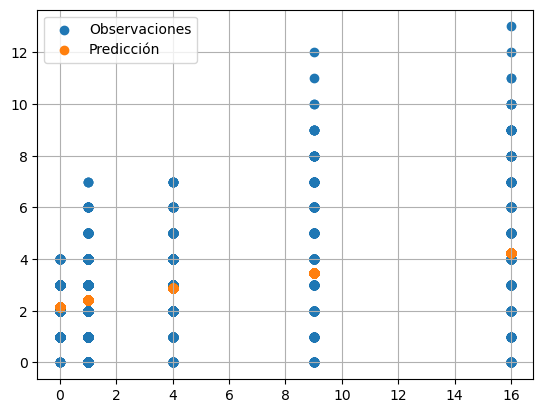

In [60]:

import matplotlib.pyplot as plt
# Graficar los datos originales y las predicciones
plt.scatter(df['Esc_cuad'],df['No. de hijos'],label='Observaciones')
plt.scatter(df['Esc_cuad'],f,label='Predicción')
plt.legend()
plt.grid()
